In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn import neighbors, datasets

In [27]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [29]:
df = pd.read_csv(iris, sep=',')

In [30]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [38]:
col_name = ["Sepal_length", "Sepal_width", "Petal_length", "Petal_width", "Species"]
df.columns = col_name

In [40]:
type(df)

pandas.core.frame.DataFrame

In [44]:
df = df.replace('Iris-setosa',0)
df = df.replace('Iris-virginica',2)
df = df.replace('Iris-versicolor',1)
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [50]:
X = df.drop('Species',axis = 1)
y = df['Species']

In [48]:
X.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [53]:
X.shape


(149, 4)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
knn = KNeighborsClassifier(n_neighbors=1)

In [176]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [177]:
list = [3,5,4,2]
df_test = pd.DataFrame([list])
df_test

,0,1,2,3
0,3,5,4,2


In [178]:
knn.predict(df_test)

array([2])

In [ ]:
#For the Boundaries we will redo the classification with 2 dimensions as there needs to be plot

In [196]:
#Coverting dataframe back to an array for X and y
X_new = X.values[:, :2]
X_new

array([[ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,  3.2],
       [ 5.3,

In [199]:
y_new = y.values

In [188]:
#Setting Colors for the graph (Red, Blue and Green)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [208]:
#Creating the Knn

for weights in ['uniform', 'distance']:
    knn_new = neighbors.KNeighborsClassifier(1, weights=weights)
    knn_new.fit(X_new, y_new)

In [209]:
#Assigning Values

x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
a = knn_new.predict(np.c_[xx.ravel(), yy.ravel()])

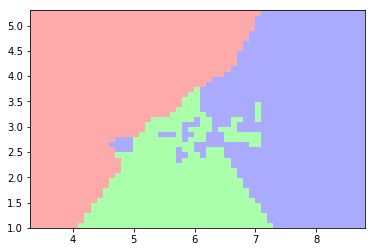

In [210]:
#Creating the Plot
A = a.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, A, cmap=cmap_light)

(1.0, 5.3000000000000043)

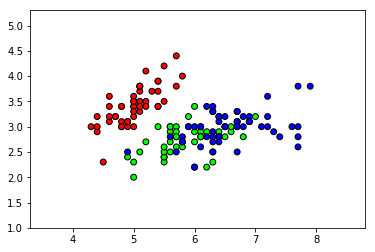

In [217]:
#Plotting the Values only

plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=cmap_bold,
                edgecolor='Black', s=35)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

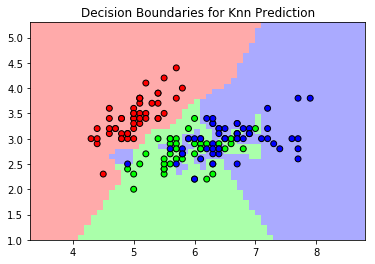

In [220]:
#COmbining both the Graphs 

A = a.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, A, cmap=cmap_light)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=cmap_bold,
                edgecolor='Black', s=35)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision Boundaries for Knn Prediction")